In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline                         

In [262]:
housedata1_train=pd.read_csv("D:/analytics/Hackathon/HousePrice Prediction/train.csv") #importing data in csv format

In [263]:
housedata1_train.head() # look out for three types of dat 1) Numerial 2) Values/categories codded as Numeric(vaues) 3)categorical data 4) character data/string data 5) dates types/time series

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [264]:
(housedata1_train.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [265]:
housedata1_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

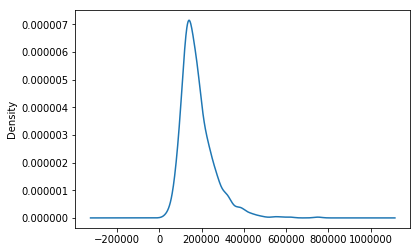

In [266]:
housedata1_train['SalePrice'].plot(kind="kde")

{'boxes': [<matplotlib.lines.Line2D at 0x1f946990ac8>],
 'caps': [<matplotlib.lines.Line2D at 0x1f94699a630>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f9469a2390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f94699aef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f946990c50>,
  <matplotlib.lines.Line2D at 0x1f94699a1d0>]}

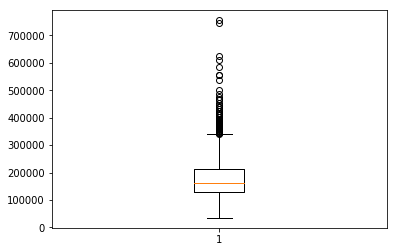

In [267]:
plt.boxplot(housedata1_train['SalePrice']) #to check out the outliers in predicted variable

In [268]:
corr = housedata1_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr() #correlation matrix

In [269]:
cor_dict = corr['SalePrice'].to_dict()

In [270]:
del cor_dict['SalePrice']

In [271]:
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):  # to check each variable correlation with predicted variable in ascending order
    print("{0}: \t{1}".format(*ele))

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCond: 	-0.0778558940486776
MoSold: 	0.04643224522381936
3SsnPorch: 	0.044583665335

In [272]:
housedata1_trainnum=housedata1_train.select_dtypes(include=[np.number]) # strategy 1 split the data frame into numeric and character data frame and values
housedata1_traincat=housedata1_train.select_dtypes(include=[object])

In [273]:
housedata1_trainnum.shape  # numeric variable colulmns

(1460, 38)

In [274]:
housedata1_traincat.shape  # categorical variable columns

(1460, 43)

In [275]:
housedata1_trainnum.head() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [276]:
housedata1_trainnum.columns #"MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold" these data values are not numeric hence deleting

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [277]:
housepricevalues1=housedata1_trainnum[["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]]

In [278]:
housedata1_trainnum=housedata1_trainnum.drop(["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"],axis=1)

In [279]:
housedata1_trainnum.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,250000


In [280]:
(housedata1_trainnum.isnull().sum()).sort_values(ascending=False) 

LotFrontage      259
MasVnrArea         8
SalePrice          0
MiscVal            0
LotArea            0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
Id                 0
dtype: int64

In [281]:
housedata1_trainnum['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

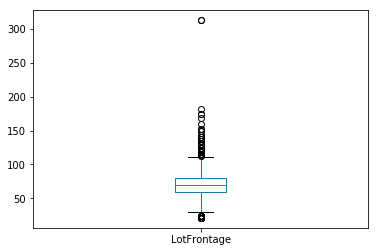

In [282]:
housedata1_trainnum['LotFrontage'].plot(kind="box")

In [283]:
housedata1_trainnum["LotFrontage"] = housedata1_trainnum["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

In [284]:
housedata1_trainnum["LotFrontage"].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [285]:
housedata1_trainnum['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [286]:
housedata1_trainnum["MasVnrArea"] = housedata1_trainnum["MasVnrArea"].fillna(0)  #there is a realtionship between MasVnrType and MasVnrArea, when NONE then 0 and viceversa

In [287]:
housedata1_trainnum['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [288]:
(housedata1_trainnum.isnull().sum()).sort_values(ascending=False) 

SalePrice        0
MiscVal          0
LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
Id               0
dtype: int64

In [289]:
housepricevalues1.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,7,5,2003,2003,2003.0,2,2008
1,20,6,8,1976,1976,1976.0,5,2007
2,60,7,5,2001,2002,2001.0,9,2008
3,70,7,5,1915,1970,1998.0,2,2006
4,60,8,5,2000,2000,2000.0,12,2008


In [290]:
(housepricevalues1.isnull().sum()).sort_values(ascending=False) 

GarageYrBlt     81
YrSold           0
MoSold           0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
MSSubClass       0
dtype: int64

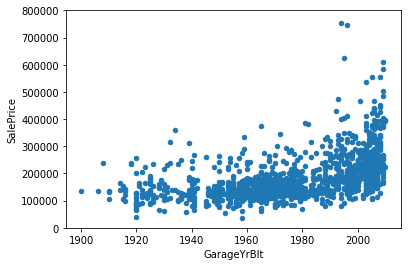

In [291]:
#bivariate analysis saleprice/GarageYrBlt
var = 'GarageYrBlt'
data = pd.concat([housedata1_train['SalePrice'], housedata1_train[var]], axis=1)   # for categorical variables
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [292]:
housepricevalues1["GarageYrBlt"] = housepricevalues1["GarageYrBlt"].fillna(2005.0) #mode of the GarageYrBlt
#Garagecars and Area are not null

In [293]:
(housepricevalues1.isnull().sum()).sort_values(ascending=False) 

YrSold          0
MoSold          0
GarageYrBlt     0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
MSSubClass      0
dtype: int64

In [294]:
housedata1_traincat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [295]:
(housedata1_traincat.isnull().sum()).sort_values(ascending=False) 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [296]:
Garagecols=["GarageType","GarageCond","GarageQual","GarageFinish"] #mod imputation

In [297]:
for cols in Garagecols:
    Garagecol=pd.value_counts(housedata1_traincat[cols])
    print(Garagecol)

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [298]:
for col in Garagecols:
    housedata1_traincat[col].fillna(housedata1_traincat[col].value_counts().idxmax(),inplace=True) #idxmax will impute the name of the column(for categorical value),max will impute column value(for numerical value)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [299]:
(housedata1_traincat.isnull().sum()).sort_values(ascending=False) 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
BsmtExposure       38
BsmtFinType2       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrType          8
Electrical          1
LotConfig           0
LandSlope           0
Exterior1st         0
Neighborhood        0
Condition1          0
Condition2          0
Utilities           0
LandContour         0
LotShape            0
Street              0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
SaleCondition       0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
GarageType          0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
MSZoning            0
dtype: int64

In [300]:
Bsmtcols=["BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"] # mod imputation

In [301]:
for cols in Bsmtcols:
    Bsmtcol=pd.value_counts(housedata1_traincat[cols])
    print(Bsmtcol)

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [302]:
for col in Bsmtcols:
    housedata1_traincat[col] = housedata1_traincat[col].fillna('None')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [303]:
(housedata1_traincat.isnull().sum()).sort_values(ascending=False) 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
MasVnrType          8
Electrical          1
Condition1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
HouseStyle          0
BldgType            0
Condition2          0
SaleCondition       0
Neighborhood        0
ExterQual           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
LandSlope           0
BsmtQual            0
ExterCond           0
Foundation          0
PavedDrive          0
GarageCond          0
GarageQual          0
GarageFinish        0
GarageType          0
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
BsmtFinType2        0
BsmtFinType1        0
BsmtExposure        0
BsmtCond            0
SaleType            0
MSZoning            0
dtype: int64

In [304]:
housedata1_traincat["MasVnrType"] = housedata1_traincat["MasVnrType"].fillna("None")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [305]:
(housedata1_traincat.isnull().sum()).sort_values(ascending=False) 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
Electrical          1
SaleCondition       0
Condition1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
HouseStyle          0
BldgType            0
Condition2          0
LandSlope           0
Neighborhood        0
ExterQual           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
MasVnrType          0
BsmtQual            0
ExterCond           0
Foundation          0
PavedDrive          0
GarageCond          0
GarageQual          0
GarageFinish        0
GarageType          0
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
BsmtFinType2        0
BsmtFinType1        0
BsmtExposure        0
BsmtCond            0
SaleType            0
MSZoning            0
dtype: int64

In [306]:
nonecols=["Alley","Fence","PoolQC","MiscFeature","FireplaceQu"] 

In [307]:
for col in nonecols:
    housedata1_traincat[col] =  housedata1_traincat[col].fillna("None")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [308]:
(housedata1_traincat.isnull().sum()).sort_values(ascending=False) 

Electrical       1
SaleCondition    0
Foundation       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
BsmtCond         0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
FireplaceQu      0
Functional       0
KitchenQual      0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64

In [309]:
housedata1_traincat['Electrical'] = housedata1_traincat['Electrical'].fillna(housedata1_traincat['Electrical'].mode()[0])


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [310]:
(housedata1_traincat.isnull().sum()).sort_values(ascending=False) 

SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
Foundation       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
FireplaceQu      0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
BsmtCond         0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64

In [311]:
housepricevalues1.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,7,5,2003,2003,2003.0,2,2008
1,20,6,8,1976,1976,1976.0,5,2007
2,60,7,5,2001,2002,2001.0,9,2008
3,70,7,5,1915,1970,1998.0,2,2006
4,60,8,5,2000,2000,2000.0,12,2008


In [312]:
strcols=["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

In [313]:
for col in strcols:
    housepricevalues1[col] =  housepricevalues1[col].astype(str)   #Transforming some numerical variables that are really categorical

In [314]:
# Adding total sqfootage feature (total area of basement, first and second floor areas of each house)
housedata1_trainnum['TotalSF'] = housedata1_trainnum['TotalBsmtSF'] + housedata1_trainnum['1stFlrSF'] + housedata1_trainnum['2ndFlrSF']

In [315]:
housedata1_trainnum.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,548,0,61,0,0,0,0,0,208500,2566
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,460,298,0,0,0,0,0,0,181500,2524
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,608,0,42,0,0,0,0,0,223500,2706
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,642,0,35,272,0,0,0,0,140000,2473
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,836,192,84,0,0,0,0,0,250000,3343


In [316]:
from sklearn.preprocessing import LabelEncoder

In [317]:
le=LabelEncoder()

In [318]:
housedata1_traincat1=housedata1_traincat.apply(le.fit_transform)
house1pricevalues1=housepricevalues1.apply(le.fit_transform)

In [319]:
housepricedf1=pd.concat([housedata1_trainnum,housedata1_traincat1,house1pricevalues1],axis=1)

In [320]:
housepricedf1.head().transpose()

,0,1,2,3,4
Id,1.0,2.0,3.0,4.0,5.0
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0


In [321]:
from sklearn import preprocessing     #for normalzing data

In [322]:
housepricedf1=pd.DataFrame(preprocessing.normalize(housepricedf1),columns = housepricedf1.columns)  #normalize data

In [323]:
housepricedf1.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,0.000005,0.000311,0.040488,0.000939,0.003383,0.0,0.000719,0.004102,0.004102,0.004092,...,0.000038,0.000019,0.000043,0.000034,0.000019,0.000498,0.000254,0.000426,0.000019,0.000010
1,0.000011,0.000440,0.052809,0.000000,0.005380,0.0,0.001562,0.006942,0.006942,0.000000,...,0.000044,0.000022,0.000022,0.000033,0.000039,0.000424,0.000143,0.000341,0.000039,0.000006
2,0.000013,0.000304,0.050265,0.000724,0.002171,0.0,0.001939,0.004111,0.004111,0.003869,...,0.000036,0.000018,0.000040,0.000031,0.000018,0.000456,0.000232,0.000389,0.000049,0.000009
3,0.000028,0.000427,0.068035,0.000000,0.001539,0.0,0.003847,0.005386,0.006846,0.005386,...,0.000057,0.000000,0.000071,0.000050,0.000028,0.000135,0.000142,0.000598,0.000028,0.000000
4,0.000020,0.000335,0.056938,0.001397,0.002615,0.0,0.001956,0.004572,0.004572,0.004204,...,0.000032,0.000016,0.000036,0.000032,0.000016,0.000403,0.000200,0.000343,0.000012,0.000008


In [324]:
#For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
housepricedf1 = housepricedf1.drop(['Utilities'], axis=1)

In [325]:
housepricedf1.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,0.000005,0.000311,0.040488,0.000939,0.003383,0.0,0.000719,0.004102,0.004102,0.004092,...,0.000038,0.000019,0.000043,0.000034,0.000019,0.000498,0.000254,0.000426,0.000019,0.000010
1,0.000011,0.000440,0.052809,0.000000,0.005380,0.0,0.001562,0.006942,0.006942,0.000000,...,0.000044,0.000022,0.000022,0.000033,0.000039,0.000424,0.000143,0.000341,0.000039,0.000006
2,0.000013,0.000304,0.050265,0.000724,0.002171,0.0,0.001939,0.004111,0.004111,0.003869,...,0.000036,0.000018,0.000040,0.000031,0.000018,0.000456,0.000232,0.000389,0.000049,0.000009
3,0.000028,0.000427,0.068035,0.000000,0.001539,0.0,0.003847,0.005386,0.006846,0.005386,...,0.000057,0.000000,0.000071,0.000050,0.000028,0.000135,0.000142,0.000598,0.000028,0.000000
4,0.000020,0.000335,0.056938,0.001397,0.002615,0.0,0.001956,0.004572,0.004572,0.004204,...,0.000032,0.000016,0.000036,0.000032,0.000016,0.000403,0.000200,0.000343,0.000012,0.000008


In [326]:
y=housedata1_train.SalePrice
X=housepricedf1.drop(["Id","SalePrice"],axis=1)

In [327]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,0.000311,0.040488,0.000939,0.003383,0.0,0.000719,0.004102,0.004102,0.004092,0.0,...,0.000038,0.000019,0.000043,0.000034,0.000019,0.000498,0.000254,0.000426,0.000019,0.000010
1,0.000440,0.052809,0.000000,0.005380,0.0,0.001562,0.006942,0.006942,0.000000,0.0,...,0.000044,0.000022,0.000022,0.000033,0.000039,0.000424,0.000143,0.000341,0.000039,0.000006
2,0.000304,0.050265,0.000724,0.002171,0.0,0.001939,0.004111,0.004111,0.003869,0.0,...,0.000036,0.000018,0.000040,0.000031,0.000018,0.000456,0.000232,0.000389,0.000049,0.000009
3,0.000427,0.068035,0.000000,0.001539,0.0,0.003847,0.005386,0.006846,0.005386,0.0,...,0.000057,0.000000,0.000071,0.000050,0.000028,0.000135,0.000142,0.000598,0.000028,0.000000
4,0.000335,0.056938,0.001397,0.002615,0.0,0.001956,0.004572,0.004572,0.004204,0.0,...,0.000032,0.000016,0.000036,0.000032,0.000016,0.000403,0.000200,0.000343,0.000012,0.000008


In [328]:
from sklearn.linear_model import LinearRegression   # model building

In [329]:
LinReg=LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [330]:
LinReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [331]:
LinReg.score(X,y)

0.79999263849341185

In [332]:
LinRegpredict=LinReg.predict(X)

In [397]:
from sklearn.ensemble import GradientBoostingRegressor

In [398]:
GBoost = GradientBoostingRegressor().fit(X,y)

In [399]:
GBoost.score(X,y)

0.99850408662373535

In [400]:
GBMpredict=GBoost.predict(X)

In [186]:
from sklearn.ensemble import RandomForestRegressor         ## Random Forest ##

In [194]:
rf =  RandomForestRegressor(n_estimators=150)

In [195]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [196]:
rf.score(X,y)

0.99911868635871304

In [197]:
rfpredict=rf.predict(X)

In [333]:
housedata1_test=pd.read_csv("D:/analytics/Hackathon/HousePrice Prediction/test.csv") #importing data in csv format test file

In [334]:
housedata1_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [335]:
housedata_test=housedata1_test["Id"]

In [336]:
housedata_test.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [337]:
housedata1_test=housedata1_test.drop(["Id"],axis=1)

In [338]:
housedata1_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [339]:
housedata1_testnum=housedata1_test.select_dtypes(include=[np.number]) # strategy 1 split the data frame into numeric and character data frame and values
housedata1_testcat=housedata1_test.select_dtypes(include=[object])

In [340]:
housedata1_testnum.shape  # numeric variable colulmns

(1459, 36)

In [341]:
housedata1_testcat.shape  # categorical variable columns

(1459, 43)

In [342]:
housedata1_testnum.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [343]:
housedata1_testnum.columns #"MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold" these data values are not numeric hence deleting

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [344]:
housepricevalues_test=housedata1_testnum[["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]]

In [345]:
housedata1_testnum=housedata1_testnum.drop(["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"],axis=1)

In [346]:
housedata1_testnum.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,...,0,1.0,730.0,140,0,0,0,120,0,0
1,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,...,0,1.0,312.0,393,36,0,0,0,0,12500
2,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,...,1,2.0,482.0,212,34,0,0,0,0,0
3,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,...,1,2.0,470.0,360,36,0,0,0,0,0
4,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,...,0,2.0,506.0,0,82,0,0,144,0,0


In [347]:
(housedata1_testnum.isnull().sum()).sort_values(ascending=False)

LotFrontage      227
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
GarageArea         1
GarageCars         1
TotalBsmtSF        1
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
MiscVal            0
PoolArea           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
FullBath           0
dtype: int64

In [348]:
housedata1_testnum["LotFrontage"] = housedata1_testnum["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

In [349]:
housedata1_testnum["MasVnrArea"] = housedata1_testnum["MasVnrArea"].fillna(0)  #there is a realtionship between MasVnrType and MasVnrArea, when NONE then 0 and viceversa

In [350]:
(housedata1_testnum.isnull().sum()).sort_values(ascending=False)

BsmtHalfBath     2
BsmtFullBath     2
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
GarageArea       1
GarageCars       1
TotalBsmtSF      1
MiscVal          0
LotArea          0
MasVnrArea       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
PoolArea         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
LotFrontage      0
dtype: int64

In [351]:
Garagecols1 = ["GarageArea", "GarageCars"]

In [352]:
for col in Garagecols1:
    housedata1_testnum[col].fillna(housedata1_testnum[col].value_counts().idxmax(),inplace=True) #idxmax will impute the name of the column(for categorical value),max will impute column value(for numerical value)

In [353]:
(housedata1_testnum.isnull().sum()).sort_values(ascending=False)

BsmtFullBath     2
BsmtHalfBath     2
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
MiscVal          0
PoolArea         0
LotArea          0
MasVnrArea       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
LotFrontage      0
dtype: int64

In [354]:
Bsmtcol1=["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

In [355]:
for col in Bsmtcol1:
    housedata1_testnum[col] = housedata1_testnum[col].fillna(0)

In [356]:
(housedata1_testnum.isnull().sum()).sort_values(ascending=False)

MiscVal          0
PoolArea         0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
LotFrontage      0
dtype: int64

In [357]:
housedata1_testcat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [358]:
(housedata1_testcat.isnull().sum()).sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
GarageCond         78
GarageQual         78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType2       42
BsmtFinType1       42
MasVnrType         16
MSZoning            4
Utilities           2
Functional          2
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition2          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
RoofStyle           0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
Electrical          0
CentralAir          0
SaleCondition       0
dtype: int64

In [359]:
Garagecols2=["GarageType","GarageCond","GarageQual","GarageFinish"] #mod imputation

In [360]:
for col in Garagecols2:
    housedata1_testcat[col].fillna(housedata1_testcat[col].value_counts().idxmax(),inplace=True) #idxmax will impute the name of the column(for categorical value),max will impute column value(for numerical value)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [361]:
Bsmtcols2=["BsmtCond","BsmtQual","BsmtExposure","BsmtFinType2","BsmtFinType1"]

In [362]:
for col in Bsmtcols2:
    housedata1_testcat[col] = housedata1_testcat[col].fillna('None')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [363]:
housedata1_testcat["MasVnrType"] = housedata1_testcat["MasVnrType"].fillna("None")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [364]:
nonecols2=["Alley","Fence","PoolQC","MiscFeature","FireplaceQu"] 

In [365]:
for col in nonecols2:
    housedata1_testcat[col] =  housedata1_testcat[col].fillna("None")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [366]:
(housedata1_testcat.isnull().sum()).sort_values(ascending=False)

MSZoning         4
Utilities        2
Functional       2
SaleType         1
Exterior2nd      1
Exterior1st      1
KitchenQual      1
Alley            0
BldgType         0
MasVnrType       0
RoofMatl         0
RoofStyle        0
HouseStyle       0
Condition2       0
LotShape         0
ExterCond        0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Street           0
LandContour      0
ExterQual        0
SaleCondition    0
Foundation       0
GarageType       0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
FireplaceQu      0
BsmtCond         0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtQual         0
dtype: int64

In [367]:
housedata1_testcat['MSZoning'] = housedata1_testcat['MSZoning'].fillna(housedata1_testcat['MSZoning'].mode()[0])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [368]:
#For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
housedata1_testcat = housedata1_testcat.drop(['Utilities'], axis=1)

In [369]:
housedata1_testcat["Functional"] = housedata1_testcat["Functional"].fillna("Typ")

In [370]:
housedata1_testcat['KitchenQual'] = housedata1_testcat['KitchenQual'].fillna(housedata1_testcat['KitchenQual'].mode()[0])

In [371]:
housedata1_testcat['Exterior1st'] = housedata1_testcat['Exterior1st'].fillna(housedata1_testcat['Exterior1st'].mode()[0])

In [372]:
housedata1_testcat['Exterior2nd'] = housedata1_testcat['Exterior2nd'].fillna(housedata1_testcat['Exterior2nd'].mode()[0])

In [373]:
housedata1_testcat['SaleType'] = housedata1_testcat['SaleType'].fillna(housedata1_testcat['SaleType'].mode()[0])

In [374]:
(housedata1_testcat.isnull().sum()).sort_values(ascending=False)

SaleCondition    0
BldgType         0
ExterCond        0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
Condition2       0
SaleType         0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
LandContour      0
LotShape         0
Alley            0
Street           0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
FireplaceQu      0
Functional       0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
MSZoning         0
dtype: int64

In [375]:
housepricevalues_test.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,20,5,6,1961,1961,1961.0,6,2010
1,20,6,6,1958,1958,1958.0,6,2010
2,60,5,5,1997,1998,1997.0,3,2010
3,60,6,6,1998,1998,1998.0,6,2010
4,120,8,5,1992,1992,1992.0,1,2010


In [376]:
(housepricevalues_test.isnull().sum()).sort_values(ascending=False) 

GarageYrBlt     78
YrSold           0
MoSold           0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
MSSubClass       0
dtype: int64

In [377]:
housepricevalues_test["GarageYrBlt"].mode()

0    2005.0
dtype: float64

In [378]:
housepricevalues_test["GarageYrBlt"] = housepricevalues_test["GarageYrBlt"].fillna(2005.0) #mode of the GarageYrBlt
#Garagecars and Area are not null

In [379]:
(housepricevalues_test.isnull().sum()).sort_values(ascending=False) 

YrSold          0
MoSold          0
GarageYrBlt     0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
MSSubClass      0
dtype: int64

In [380]:
strcols1=["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

In [381]:
for col in strcols1:
    housepricevalues_test[col] =  housepricevalues_test[col].astype(str)   #Transforming some numerical variables that are really categorical

In [382]:
# Adding total sqfootage feature (total area of basement, first and second floor areas of each house)
housedata1_testnum['TotalSF'] = housedata1_testnum['TotalBsmtSF'] + housedata1_testnum['1stFlrSF'] + housedata1_testnum['2ndFlrSF']

In [383]:
from sklearn.preprocessing import LabelEncoder

In [384]:
le=LabelEncoder()

In [385]:
housedata1_testcat1=housedata1_testcat.apply(le.fit_transform)
house1pricevalues_test1=housepricevalues_test.apply(le.fit_transform)

In [386]:
housepricedf_test=pd.concat([housedata1_testnum,housedata1_testcat1,house1pricevalues_test1],axis=1)

In [387]:
housepricedf_test.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'TotalSF', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDriv

In [388]:
housepricedf_test.head().transpose()

,0,1,2,3,4
LotFrontage,80.0,81.0,74.0,78.0,43.0
LotArea,11622.0,14267.0,13830.0,9978.0,5005.0
MasVnrArea,0.0,108.0,0.0,20.0,0.0
BsmtFinSF1,468.0,923.0,791.0,602.0,263.0
BsmtFinSF2,144.0,0.0,0.0,0.0,0.0
BsmtUnfSF,270.0,406.0,137.0,324.0,1017.0
TotalBsmtSF,882.0,1329.0,928.0,926.0,1280.0
1stFlrSF,896.0,1329.0,928.0,926.0,1280.0
2ndFlrSF,0.0,0.0,701.0,678.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0


In [389]:
from sklearn import preprocessing     #for normalzing data

In [390]:
housepricedf_test=pd.DataFrame(preprocessing.normalize(housepricedf_test),columns = housepricedf_test.columns)  #normalize data

In [391]:
housepricedf_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,0.006725,0.976991,0.000000,0.039342,0.012105,0.022697,0.074144,0.075321,0.000000,0.0,...,0.000673,0.000336,0.000420,0.000420,0.000420,0.004708,0.000925,0.003867,0.000673,0.000336
1,0.004191,0.738267,0.005589,0.047762,0.000000,0.021009,0.068771,0.068771,0.000000,0.0,...,0.000414,0.000207,0.000259,0.000310,0.000259,0.002743,0.000414,0.002225,0.000414,0.000207
2,0.005186,0.969194,0.000000,0.055433,0.000000,0.009601,0.065033,0.065033,0.049125,0.0,...,0.000561,0.000280,0.000701,0.000350,0.000280,0.006447,0.003364,0.005746,0.000350,0.000280
3,0.007385,0.944718,0.001894,0.056997,0.000000,0.030676,0.087674,0.087674,0.064193,0.0,...,0.000757,0.000379,0.000947,0.000568,0.000473,0.008805,0.004545,0.007858,0.000757,0.000379
4,0.006983,0.812732,0.000000,0.042707,0.000000,0.165145,0.207852,0.207852,0.000000,0.0,...,0.001299,0.000650,0.000000,0.001299,0.000650,0.014127,0.006820,0.012504,0.000000,0.000650


In [392]:
X1=housepricedf_test

In [393]:
X1.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,0.006725,0.976991,0.000000,0.039342,0.012105,0.022697,0.074144,0.075321,0.000000,0.0,...,0.000673,0.000336,0.000420,0.000420,0.000420,0.004708,0.000925,0.003867,0.000673,0.000336
1,0.004191,0.738267,0.005589,0.047762,0.000000,0.021009,0.068771,0.068771,0.000000,0.0,...,0.000414,0.000207,0.000259,0.000310,0.000259,0.002743,0.000414,0.002225,0.000414,0.000207
2,0.005186,0.969194,0.000000,0.055433,0.000000,0.009601,0.065033,0.065033,0.049125,0.0,...,0.000561,0.000280,0.000701,0.000350,0.000280,0.006447,0.003364,0.005746,0.000350,0.000280
3,0.007385,0.944718,0.001894,0.056997,0.000000,0.030676,0.087674,0.087674,0.064193,0.0,...,0.000757,0.000379,0.000947,0.000568,0.000473,0.008805,0.004545,0.007858,0.000757,0.000379
4,0.006983,0.812732,0.000000,0.042707,0.000000,0.165145,0.207852,0.207852,0.000000,0.0,...,0.001299,0.000650,0.000000,0.001299,0.000650,0.014127,0.006820,0.012504,0.000000,0.000650


In [259]:
rfpredict1=rf.predict(X1)

In [406]:
LinRegpredict1=LinReg.predict(X1)

In [408]:
pd.DataFrame(LinRegpredict1).to_csv("D:/analytics/Hackathon/HousePrice Prediction/LinRegpredict1.csv") #converting to csv download from home of jupyter notebook then convert the values in csv to exp in csv using exp() the file will ne in local folder

In [403]:
GBMpredict1=GBoost.predict(X1)